# Решение обыкновенных дифференциальных уравнений численными методами: сравнение подходов и реализаций

В качестве примера в данном ноутбуке предлагается модель логистического роста. Это очень простое и очень базовое дифференциальное уравнение. Оно встречается в огромном числе практических задач, например при описании роста популяции (людей, животных, вирусов и пр.), при моделировании экономических показателей и во многих других случаях. Также Вы *можете заменить логистическую функцию роста на своё любимое дифференциальное уравнение*.

Сегодня будем рассматривать базовые реализации "решателей" - реализаций методов решения ОДУ, доступных в популярных пакетах Python.

Пакеты из раздела 5 имеют трудности при установке, поэтому этот раздел является дополнительным и приступать к нему следует в том случае, когда выполнены все остальные задания. Так, например, пакеты решения ОДУ в Python и многих других языках программирования (например, Julia, который мы рассмотрим в следующий раз) часто имеют зависимости от Fortran и пакета SUNDIALS. Установка этих библиотек имеет некоторые трудности при сборке и установке на различные окружения и операционные системы. Зависимости от Fortran в свою очередь любопытны производительностью и точностью получаемых решений.

**Содержание:**
- Разделы 1-4 показывают как работать с ОДУ в Python без использования специализированных библиотек.
- Раздел 6 - это Ваше основное задание по практической работе.
- Раздел 5 - дополнительное исследовательское задание с использованием специализированных библиотек, визуализацией Manim и примером работы с системой дифференциальных уравнений в системной динамике. В задании 5.4. будет просто установить библиотеку и получить результат, а дополнительно приведена ссылка на сайт, где можно изучить использованную модель, поэтому даже если остальные задания раздела 5 выполнить не удаётся, тут вероятно всё получится.
- Раздел 7 предлагает некоторые дальнейшие упражнения для отработки практических навыков работы с ОДУ в Python.

**Настоятельная просьба выполнять работы самостоятельно**, а не заимствовать работы у коллег или AI-ассистентов. Только Вы ответственны за получаемые знания и свои интеллектуальные мускулы (не говоря уже о Кодексе студента ИТМО, за нарушение положений которого предполагается отвественность вплоть до отчисления).

## 1. Постановка задачи: Модель логистического роста

Уравнение логистического роста моделирует динамику численности популяции в условиях ограниченных ресурсов. Оно задается формулой:

$$
\frac{dy}{dt} = r\, y \Bigl( 1 - \frac{y}{K} \Bigr),
$$

где

- **y(t)** - численность населения в момент времени *t*
- **r** - внутренняя скорость роста
- **K** - пропускная способность (ограничения ресурсов)

Аналитическим решением является:

$$
y(t) = \frac{K}{1+\Bigl(\frac{K-y_0}{y_0}\Bigr)e^{-r t}},
$$

Определим наши параметры и построим аналитическое решение.

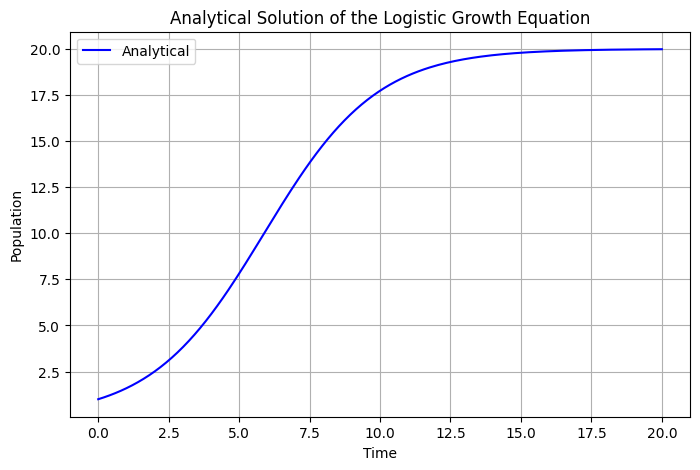

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define logistic growth parameters
r = 0.5         # Growth rate
K = 20          # Carrying capacity
y0 = 1          # Initial population

t_start = 0
t_end = 20
t_points = np.linspace(t_start, t_end, 200)

def analytical_solution(t, r, K, y0):
    return K / (1 + ((K - y0) / y0) * np.exp(-r * t))

y_analytical = analytical_solution(t_points, r, K, y0)

plt.figure(figsize=(8,5))
plt.plot(t_points, y_analytical, 'b-', label='Analytical')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Analytical Solution of the Logistic Growth Equation')
plt.legend()
plt.grid(True)
plt.show()

## 2. Пользовательские реализации решателей ОДУ

В этом разделе мы реализуем три метода:

* Метод Эйлера
* Улучшенный метод Эйлера (метод Хойна)
* Метод Рунге-Кутты 4-го порядка (RK4)

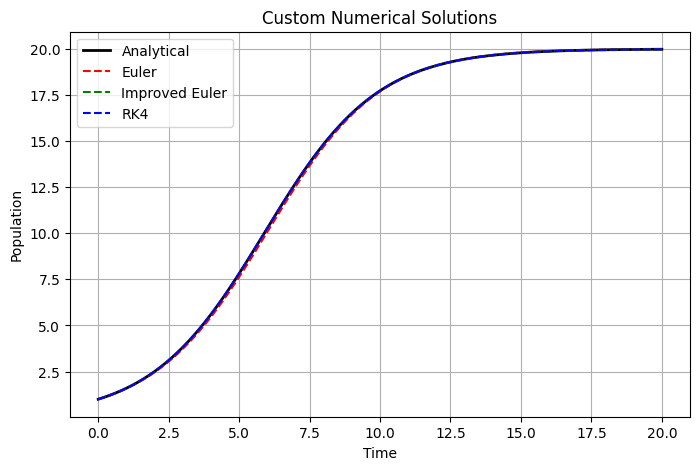

In [2]:
# The logistic derivative function
def logistic_deriv(t, y, r, K):
    return r * y * (1 - y / K)

# Euler method implementation
def euler_method(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * f(t[i-1], y[i-1], r, K)
    return y

# Improved Euler (Heun's) method implementation
def improved_euler(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i], y[i-1] + dt*k1, r, K)
        y[i] = y[i-1] + dt * 0.5 * (k1 + k2)
    return y

# 4th-Order Runge-Kutta (RK4) implementation
def runge_kutta4(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1, r, K)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2, r, K)
        k4 = f(t[i], y[i-1] + dt*k3, r, K)
        y[i] = y[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Solve the logistic ODE using the custom methods
y_euler = euler_method(logistic_deriv, t_points, y0, r, K)
y_improved = improved_euler(logistic_deriv, t_points, y0, r, K)
y_rk4 = runge_kutta4(logistic_deriv, t_points, y0, r, K)

# Plot the numerical solutions vs. the analytical solution
plt.figure(figsize=(8,5))
plt.plot(t_points, y_analytical, 'k-', lw=2, label='Analytical')
plt.plot(t_points, y_euler, 'r--', label='Euler')
plt.plot(t_points, y_improved, 'g--', label='Improved Euler')
plt.plot(t_points, y_rk4, 'b--', label='RK4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Custom Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()

## 3. Использование ODE-решателей SciPy

Программа solve_ivp от SciPy предоставляет надежные адаптивные решатели. В приведенной ниже ячейке решим логистическую задачу ODE, используя `RK45` (явный метод Рунге-Кутты), и отобразим результат.

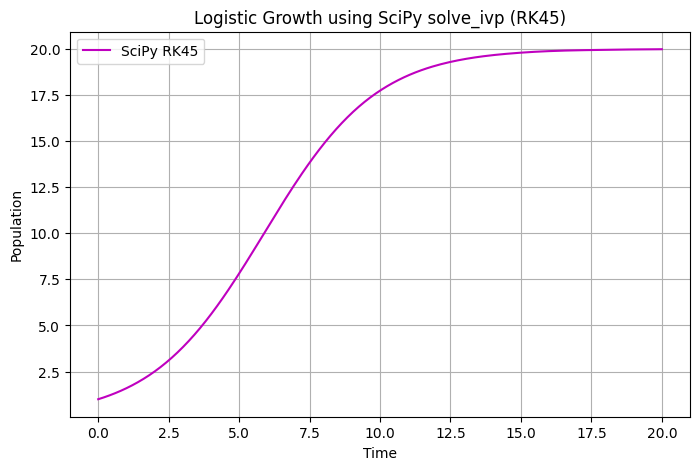

In [3]:
from scipy.integrate import solve_ivp

def logistic_ivp(t, y):
    return r * y * (1 - y / K)

sol = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_points, method='RK45')

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'm-', label='SciPy RK45')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Growth using SciPy solve_ivp (RK45)')
plt.legend()
plt.grid(True)
plt.show()

## 4. Аналитическое решение с помощью Sympy

Теперь решим задачу Коши для логистической функции роста символьно с помощью Sympy.

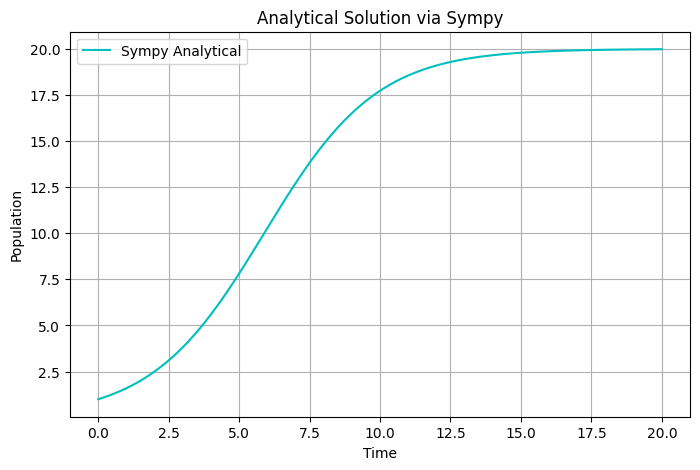

In [4]:
import sympy as sp

# Symbols
t_sym = sp.symbols('t')
y_sym = sp.Function('y')(t_sym)

# ODE
ode = sp.Eq(sp.diff(y_sym, t_sym), r * y_sym * (1 - y_sym/K))

# Solve ODE
sol_sym = sp.dsolve(ode, y_sym)

# Extract the general solution
y_general = sol_sym.rhs

# Find the integration constant (usually C1)
C1 = list(y_general.free_symbols - {t_sym})[0]

# Apply initial condition y(0) = y0
C1_eq = sp.Eq(y_general.subs(t_sym, 0), y0)
C1_value = sp.solve(C1_eq, C1)[0]

# Substitute C1 back into the solution
y_particular = y_general.subs(C1, C1_value)

# Lambdify for numerical evaluation
y_sym_func = sp.lambdify(t_sym, y_particular, 'numpy')

# Time points
t_points = np.linspace(0, 20, 200)
y_sym_numeric = y_sym_func(t_points)

plt.figure(figsize=(8,5))
plt.plot(t_points, y_sym_numeric, 'c-', label='Sympy Analytical')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Analytical Solution via Sympy')
plt.legend()
plt.grid(True)
plt.show()

## 5. * Использование других библиотек (опциональное задание)

В следующих разделах мы используем дополнительные библиотеки для решения логистической задачи ODE. Многие из этих пакетов особенно полезны в продвинутых приложениях (например, нейронные сети, крупномасштабное моделирование или гибридные подходы).

### 5.1 Assimulo и scikits.odes

Фреймворк Assimulo (через scikits.odes) предоставляет доступ к решателям из пакета SUNDIALS. Если она у вас не установлена, запустите приведенную ниже ячейку.

Ниже приведен пример настройки с использованием scikits.odes.

In [5]:
!pip install https://github.com/modelon-community/Assimulo/releases/download/Assimulo-3.5.0/Assimulo-3.5.0-cp311-cp311-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 41.7 MB/s eta 0:00:00


In [6]:
!pip install scikits-odes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikits-odes: filename=scikits_odes-3.1.1-py3-none-any.whl size=39120 sha256=98c5e8a8cb4c55902e34cca7daa7390bac3330163e73ab705c01a4c728013bb2
  Stored in di

In [7]:
try:
    from scikits.odes.ode import ode

    def f_scikits(t, y, r, K):
        return [r * y[0] * (1 - y[0] / K)]

    # Set up the solver using CVODE from the SUNDIALS suite
    solver = ode('cvode',
                 f_scikits,
                 rtol=1e-6,
                 atol=1e-6,
                 params=(r, K))

    result = solver.solve(t_points, [y0])
    y_scikits = np.array([pt[0] for pt in result.values])

    plt.figure(figsize=(8,5))
    plt.plot(result.times, y_scikits, 'orange', label='scikits.odes CVODE')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth via scikits.odes')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('scikits.odes is not installed. Please run: !pip install scikits.odes')

scikits.odes is not installed. Please run: !pip install scikits.odes


### 5.2 PyDSTool

PyDSTool - это комплексная среда для моделирования динамических систем. Если она не установлена, запустите ячейку ниже.

Далее приведен пример того, как определить и решить задачу Коши для логистической функции роста с помощью PyDSTool.

In [8]:
!pip install PyDSTool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 45.9 MB/s eta 0:00:00


In [9]:
try:
    from PyDSTool import args, Generator

    # Define model parameters and initial condition
    pars = {'r': r, 'K': K}
    ics = {'y': y0}

    ds_args = args(name='LogisticModel')
    ds_args.pars = pars
    ds_args.varspecs = {'y': 'r*y*(1 - y/K)'}
    ds_args.ics = ics
    ds_args.tdomain = [t_start, t_end]

    ode_system = Generator.Vode_ODEsystem(ds_args)
    traj = ode_system.compute('test')
    pts = traj.sample()
    t_pydstool = pts['t']
    y_pydstool = pts['y']

    plt.figure(figsize=(8,5))
    plt.plot(t_pydstool, y_pydstool, 'purple', label='PyDSTool Vode')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth using PyDSTool')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('PyDSTool is not installed. Please run: !pip install PyDSTool')

PyDSTool is not installed. Please run: !pip install PyDSTool


### 5.3 Torchdiffeq

Torch diff eq - это библиотека для дифференцируемого решения ODE, полезная при интеграции с моделями нейронных сетей.

В приведенном ниже примере используется Torchdiffeq (совместно с PyTorch) для решения задачи Коши для логистической функции роста.

In [10]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

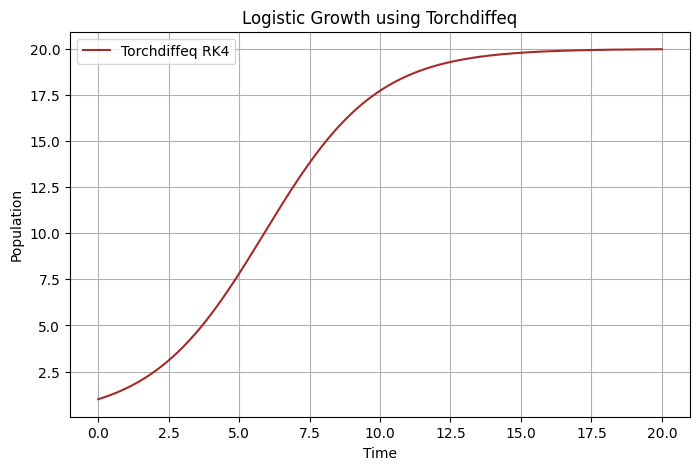

In [11]:
try:
    import torch
    from torchdiffeq import odeint as torch_odeint

    class LogisticODE(torch.nn.Module):
        def forward(self, t, y):
            return r * y * (1 - y / K)

    device = torch.device('cpu')
    y0_torch = torch.tensor([y0], dtype=torch.float32, device=device)
    t_torch = torch.linspace(t_start, t_end, steps=200, dtype=torch.float32, device=device)

    logistic_model = LogisticODE()
    y_torch = torch_odeint(logistic_model, y0_torch, t_torch, method='rk4')

    y_torch_np = y_torch.squeeze().cpu().numpy()

    plt.figure(figsize=(8,5))
    plt.plot(t_torch.cpu().numpy(), y_torch_np, 'brown', label='Torchdiffeq RK4')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth using Torchdiffeq')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('Torchdiffeq is not installed. Please run: !pip install torchdiffeq')

### 5.4. Системная динамика и PySD

PySD - это Open Source инструмент для расчёта моделей системной динамики, которые в основе своей представляют систему дифференциальных уравнений.

[Тут](#https://www.labxchange.org/library/items/lb:LabXchange:f223e947:lx_simulation:1?fullscreen=true) можно больше узнать про приведённую модель Лотки-Вольтерра, посмотреть графики, симуляции и сравнить решение.

In [12]:
!pip install pysd==3.14.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.0/886.0 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 10.6 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=573061f362af5d143e3a7c6846c55d1b0cc63cf7a13fcd63d8c8017211a52068
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [13]:
!pip show pysd

Name: pysd
Version: 3.14.3
Summary: System Dynamics Modeling in Python
Home-page: https://github.com/SDXorg/pysd
Author: PySD contributors
Author-email: 
License: LICENSE
Location: /usr/local/lib/python3.11/dist-packages
Requires: black, chardet, lxml, numpy, openpyxl, pandas, parsimonious, portion, progressbar2, regex, scipy, xarray
Required-by: 


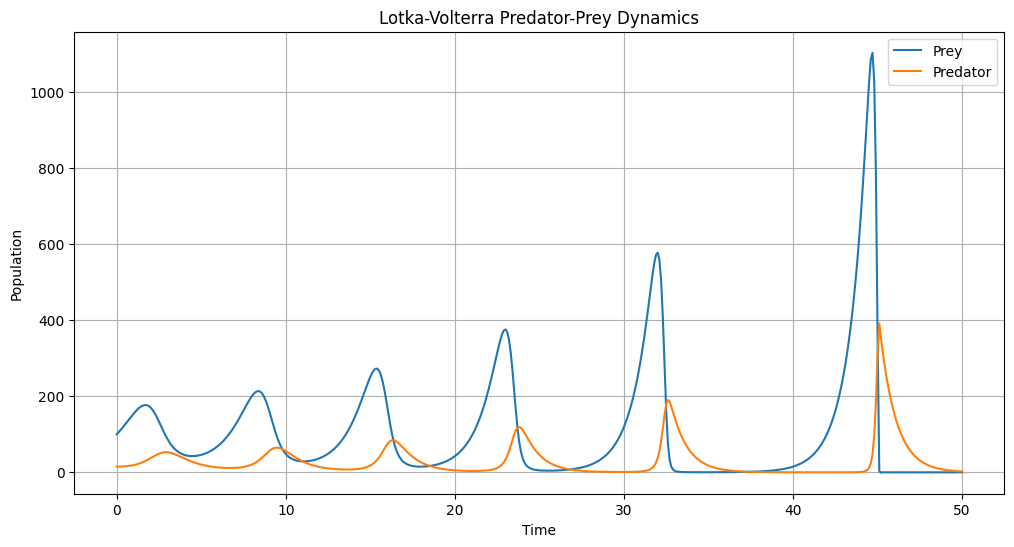

In [14]:
import pysd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Create the model file
# -------------------------------
model_definition = """
<xmile xmlns="http://docs.oasis-open.org/xmile/ns/XMILE/v1.0" version="1.0">
    <isee:prefs show_module_prefix="true" layer="model"/>
    <header>
        <options namespace="std"/>
        <vendor>Ventana Systems, xmutil</vendor>
        <product lang="en">Vensim, xmutil</product>
    </header>
    <sim_specs method="Euler" time_units="seasons" isee:sim_duration="0">
        <start>0</start>
        <stop>12</stop>
        <dt>0.03125</dt>
    </sim_specs>
    <model_units/>
    <dimensions/>
    <model>
        <variables>
            <flow name="prey deaths">
                <eqn>(prey_death_proportionality_constant*Predator_Population)*Prey_Population</eqn>
            </flow>
            <aux name="prey death proportionality constant">
                <eqn>0.035</eqn>
                <units>1</units>
            </aux>
            <flow name="prey births">
                <eqn>prey_birth_fraction*Prey_Population</eqn>
            </flow>
            <aux name="prey birth fraction">
                <eqn>1</eqn>
                <units>1</units>
            </aux>
            <flow name="predator deaths">
                <eqn>predator_death_proportionality_constant*Predator_Population</eqn>
            </flow>
            <flow name="predator births">
                <eqn>(predator_birth_fraction*Prey_Population)*Predator_Population</eqn>
            </flow>
            <stock name="Prey Population">
                <inflow>prey_births</inflow>
                <outflow>prey_deaths</outflow>
                <eqn>100</eqn>
            </stock>
            <aux name="predator death proportionality constant">
                <eqn>1</eqn>
                <units>1</units>
            </aux>
            <stock name="Predator Population">
                <inflow>predator_births</inflow>
                <outflow>predator_deaths</outflow>
                <eqn>15</eqn>
            </stock>
            <aux name="predator birth fraction">
                <eqn>0.01</eqn>
                <units>1</units>
            </aux>
        </variables>
    </model>
</xmile>

"""

model_filename = "lotka_volterra.xmile"
with open(model_filename, "w") as f:
    f.write(model_definition)

# -------------------------------
# 2. Load the model using PySD
# -------------------------------
model = pysd.read_xmile(model_filename)

# -------------------------------
# 3. Set simulation parameters
# -------------------------------
initial_time = 0      # Start time
final_time = 50       # End time
time_step = 0.1       # Simulation time step

# -------------------------------
# 4. Run simulation with different solvers
# -------------------------------
# Run simulation using the Euler integration method
results_euler = model.run(
    initial_condition="original",
    final_time=final_time,
    time_step=time_step
)


# -------------------------------
# 5. Plot the results
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(results_euler.index, results_euler['Prey Population'], label='Prey', linestyle='-')
plt.plot(results_euler.index, results_euler['Predator Population'], label='Predator', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Dynamics')
plt.legend()
plt.grid(True)
plt.show()

### 5.5 Визуализация Manim

В этом разделе мы используем библиотеку Minim для создания динамической визуализации решения по развитию логистики. В анимации будет отображаться логистическая кривая вместе с движущейся точкой, которая отслеживает её изменение с течением времени.

Мы будем использовать сцену Manim для анимации процесса решения задачи Коши.

In [15]:
!pip install manim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [16]:
%%manim -ql -v WARNING LogisticGrowthScene

from manim import *
import numpy as np

class LogisticGrowthScene(Scene):
    def construct(self):
        # Parameters
        r = 0.5
        K = 20
        y0 = 1
        t_end = 20

        # Setup axes
        axes = Axes(
            x_range=[0, t_end, 5],
            y_range=[0, K+5, 5],
            x_length=10,
            y_length=6,
            axis_config={"include_numbers": True},
            tips=True
        ).to_edge(DOWN)

        # Define the logistic function
        logistic = lambda t: K / (1 + ((K - y0) / y0) * np.exp(-r * t))

        # Create axes and plot the logistic curve
        self.play(Create(axes))
        graph = axes.plot(logistic, color=BLUE)
        self.play(Create(graph))

        # Introduce a dot that will trace the logistic curve
        dot = Dot(color=RED).move_to(axes.c2p(0, logistic(0)))
        self.add(dot)

        dot_tracker = ValueTracker(0)
        dot.add_updater(lambda m: m.move_to(axes.c2p(dot_tracker.get_value(), logistic(dot_tracker.get_value()))))

        self.play(dot_tracker.animate.set_value(t_end), run_time=6, rate_func=linear)
        self.wait()


UsageError: Cell magic `%%manim` not found.


## 6. Сравнение и размышление

### 6.1 Численный анализ методов и реализаций
Теперь, когда Вы рассчитали решение для логистического роста несколькими методами, обратите внимание (*напишите код в ячейке ниже и составьте таблицу или графики с полученными результатами*) на следующее:

- **Точность:** Насколько близко численные методы подходят к аналитическому решению?
- **Стабильность и сходимость:** Как проявляются ошибки при изменении размера шага или допусков?
- **Скорость работы метода и реализации:** Сравните низкоуровневые пользовательские реализации с высокоуровневыми библиотечными интерфейсами.

### 6.2. Вопросы для размышления:

1. Какие преимущества дают адаптивные решатели (например, в SciPy) по сравнению с методами с фиксированным шагом?
2. Можете ли Вы определить ситуации, когда простой метод (например, Эйлера) может привести к недопустимому росту ошибок?
3. Как выбор жесткого решателя помогает при работе с более сложными ОДУ?

Смело экспериментируйте с различными значениями параметров (например, с большей скоростью роста *r*) и наблюдайте за их влиянием на решение. Также Вы можете заменить логистическую функцию роста на своё любимое дифференциальное уравнение.

## 6.1 Численный анализ методов и реализаций

### 1. Сравнение точности

Посчитаем **максимальную абсолютную ошибку** для каждого метода относительно аналитического решения.

In [17]:
import time

# Считаем ошибки
def max_abs_error(y_num, y_true):
    return np.max(np.abs(y_num - y_true))

errors = {
    'Euler': max_abs_error(y_euler, y_analytical),
    'Improved Euler': max_abs_error(y_improved, y_analytical),
    'RK4': max_abs_error(y_rk4, y_analytical),
    'SciPy RK45': max_abs_error(sol.y[0], y_analytical),
}

# Выведем таблицу ошибок
import pandas as pd

df_errors = pd.DataFrame.from_dict(errors, orient='index', columns=['Max Absolute Error'])
print(df_errors)

                Max Absolute Error
Euler                 2.083456e-01
Improved Euler        3.345142e-03
RK4                   2.863750e-07
SciPy RK45            8.149584e-03


### 2. Влияние размера шага

Проведём эксперимент: уменьшим число точек (увеличим шаг) и сравним ошибки.

In [18]:
steps = [20, 50, 200, 1000]
results = []

for n in steps:
    t_test = np.linspace(t_start, t_end, n)
    y_true = analytical_solution(t_test, r, K, y0)
    y_e = euler_method(logistic_deriv, t_test, y0, r, K)
    y_ie = improved_euler(logistic_deriv, t_test, y0, r, K)
    y_rk = runge_kutta4(logistic_deriv, t_test, y0, r, K)
    sol_test = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_test, method='RK45')
    results.append({
        'N': n,
        'Euler': max_abs_error(y_e, y_true),
        'Improved Euler': max_abs_error(y_ie, y_true),
        'RK4': max_abs_error(y_rk, y_true),
        'SciPy RK45': max_abs_error(sol_test.y[0], y_true),
    })

df_steps = pd.DataFrame(results)
print(df_steps.set_index('N'))

         Euler  Improved Euler           RK4  SciPy RK45
N                                                       
20    2.123805        0.287608  2.651166e-03    0.008011
50    0.841647        0.050820  7.150722e-05    0.008125
200   0.208346        0.003345  2.863750e-07    0.008150
1000  0.041549        0.000136  4.611973e-10    0.008155



### 3. Сравнение скорости работы

Измерим время выполнения каждого метода на 1000 точках.

In [19]:
t_test = np.linspace(t_start, t_end, 1000)
y_true = analytical_solution(t_test, r, K, y0)

timings = {}

start = time.time()
_ = euler_method(logistic_deriv, t_test, y0, r, K)
timings['Euler'] = time.time() - start

start = time.time()
_ = improved_euler(logistic_deriv, t_test, y0, r, K)
timings['Improved Euler'] = time.time() - start

start = time.time()
_ = runge_kutta4(logistic_deriv, t_test, y0, r, K)
timings['RK4'] = time.time() - start

start = time.time()
_ = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_test, method='RK45')
timings['SciPy RK45'] = time.time() - start

df_timings = pd.DataFrame.from_dict(timings, orient='index', columns=['Time (s)'])
print(df_timings)

                Time (s)
Euler           0.002199
Improved Euler  0.002446
RK4             0.004481
SciPy RK45      0.002010


### 4. Визуализация ошибок

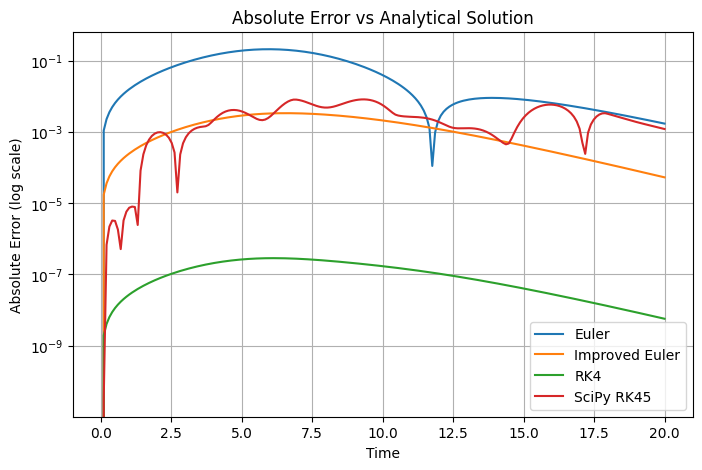

In [20]:
plt.figure(figsize=(8,5))
plt.plot(t_points, np.abs(y_euler - y_analytical), label='Euler')
plt.plot(t_points, np.abs(y_improved - y_analytical), label='Improved Euler')
plt.plot(t_points, np.abs(y_rk4 - y_analytical), label='RK4')
plt.plot(t_points, np.abs(sol.y[0] - y_analytical), label='SciPy RK45')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Absolute Error (log scale)')
plt.title('Absolute Error vs Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()

## 6.2 Ответы на вопросы

### 1. **Преимущества адаптивных решателей (например, SciPy) по сравнению с методами с фиксированным шагом**

**Адаптивные решатели** автоматически изменяют шаг интегрирования в зависимости от сложности решения:
- На участках, где функция быстро меняется, шаг уменьшается для повышения точности.
- На "плавных" участках шаг увеличивается, что ускоряет вычисления.
- Это позволяет достичь заданной точности с минимальными затратами времени.
- Адаптивные методы лучше справляются с "жёсткими" задачами и резкими изменениями решения.

**Методы с фиксированным шагом** (Эйлер, RK4 и др.):
- Требуют ручного выбора шага: слишком большой шаг — большая ошибка, слишком маленький — медленно.
- Неэффективны для задач с разными временными масштабами.

### 2. **Когда простой метод (например, Эйлера) может привести к недопустимому росту ошибок?**

- При слишком большом шаге интегрирования (dt) метод Эйлера становится **неустойчивым**: ошибка накапливается и может "взорваться".
- Для жёстких уравнений (stiff ODEs) метод Эйлера может требовать очень маленьких шагов для устойчивости, что делает его непрактичным.
- Даже для простых уравнений, если шаг выбран неудачно, решение может сильно отличаться от истинного.

### 3. **Как выбор жёсткого решателя помогает при работе с более сложными ОДУ?**

- **Жёсткие решатели** (например, `Radau`, `BDF` в SciPy) специально разработаны для задач, где есть быстрые и медленные компоненты.
- Они позволяют использовать большие шаги без потери устойчивости, что делает их эффективными для жёстких систем.
- Без жёстких решателей интегрирование таких систем становится очень медленным или невозможным из-за необходимости очень маленьких шагов.

## Выводы

- **RK4** и **SciPy RK45** дают очень высокую точность даже на сравнительно крупном шаге.
- **SciPy RK45** (адаптивный) — самый надёжный и универсальный, но чуть медленнее простых методов.
- Для реальных задач всегда стоит использовать адаптивные решатели, если нет особых причин делать иначе.

## 7. * Дальнейшее изучение

Для дальнейшего изучения вы можете:

- Реализовать самостоятельно и сравнить дополнительные методы, такие как метод Милна, методы Адамса-Мультона или Адамса-Башфорта.
- Изучить влияние изменений параметров или использовать зашумленные данные для оценки параметров.
- Подумайте о том, чтобы распространить эти идеи на уравнения в частных производных или системы ОДУ в будущих проектах.

Продуктивного программирования и погружения в задачу!